<a href="https://colab.research.google.com/github/ArnaldoBetancourt/ActividadCursera/blob/master/ChallengerTelecom2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informe de Análisis Predictivo de Churn - Empresa de Telecomunicaciones

## 1. Introducción
El objetivo de este análisis es desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios (Churn). Esto permitirá implementar estrategias de retención más efectivas y optimizar la atención al cliente.

## 2. Preparación y Limpieza de Datos
Se cargó el dataset de clientes, se eliminaron duplicados y columnas irrelevantes, se imputaron valores nulos y se aplicó One-Hot Encoding a las variables categóricas. Además, se identificaron variables relevantes mediante correlación y se verificó la multicolinealidad usando VIF, eliminando columnas con problemas de colinealidad.

## 3. Análisis Exploratorio
Se observó un ligero desbalance en la variable objetivo (Churn), con una proporción menor al 40% de clientes que cancelan. Se realizó un heatmap de correlación para identificar relaciones entre variables y la variable objetivo.

## 4. Modelos Predictivos
### 4.1 Regresión Logística
- Accuracy: 0.80
- AUC: 0.75
- Recall para clientes que cancelan: 0.79
- Matriz de Confusión:
  - TN: 737, FP: 298
  - FN: 78, TP: 296

### 4.2 Random Forest
Se entrenó un modelo Random Forest con 200 árboles, balance de clases y validación cruzada.
- Accuracy: 0.80
- AUC: 0.83
- Precisión para clientes que cancelan: 0.66
- Recall para clientes que cancelan: 0.48
- Variables más importantes: tipo de contrato, facturación mensual, soporte técnico, tenure.

## 5. Comparación de Modelos
- La Regresión Logística ofrece un mayor recall, lo que la hace adecuada para detectar clientes en riesgo de churn.
- Random Forest presenta un AUC mayor, proporcionando un mejor poder discriminativo general, pero menor capacidad para identificar todos los clientes que podrían cancelar.
- La elección del modelo depende del objetivo estratégico: detección de clientes en riesgo (Logistic Regression) vs scoring global de clientes (Random Forest).

## 6. Recomendaciones Estratégicas
1. Usar Regresión Logística para campañas de retención dirigidas a clientes críticos.
2. Utilizar Random Forest para crear un scoring global de riesgo de churn y priorizar acciones.
3. Implementar dashboards de alerta temprana con las variables más importantes identificadas.
4. Explorar modelos avanzados como XGBoost o LightGBM para mejorar la predicción.

## 7. Conclusión
Ambos modelos cumplen con la misión de identificar clientes con riesgo de cancelar sus servicios. La combinación de Regresión Logística para detección de riesgos y Random Forest para análisis global proporciona un enfoque integral para la estrategia de retención de clientes. La información derivada permite tomar decisiones informadas para reducir la tasa de churn y aumentar la fidelización de clientes.

---

## 8. Código de Implementación
A continuación se incluye el código completo utilizado para la limpieza, modelado, evaluación y análisis de importancia de variables, listo para ejecutar en un entorno de Python/Colab.


In [1]:
import pandas as pd
df = pd.read_csv('/content/df_limpo (1).csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [2]:
print("Duplicados:", df['customerID'].duplicated().sum())

# Conteo de valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# === Imputar nulos en columnas numéricas ===
df['Total.Day'].fillna(df['Total.Day'].median(), inplace=True)
df['account.Charges.Total'].fillna(df['account.Charges.Total'].median(), inplace=True)

# Comprobar que ya no haya nulos
print("Nulos después de imputar:\n", df.isnull().sum())

Duplicados: 0
Valores nulos por columna:
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
Total.Day                    11
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64
Nulos después de imputar:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure             

/tmp/ipython-input-2335307025.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Day'].fillna(df['Total.Day'].median(), inplace=True)
/tmp/ipython-input-2335307025.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [3]:
# ===  Eliminar columnas irrelevantes ===
df.drop(columns=['customerID'], inplace=True)

In [4]:
# === Transformar variables categóricas a numéricas (One-Hot Encoding) ===

# Verificamos columnas categóricas (tipo object)
cat_cols = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", cat_cols.tolist())

# Usamos one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Revisamos el nuevo shape y primeras columnas
print("Tamaño después de encoding:", df_encoded.shape)
print(df_encoded.head())



Columnas categóricas: ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']
Tamaño después de encoding: (7043, 32)
   customer.SeniorCitizen  customer.tenure  Total.Day  \
0                       0                9       2.20   
1                       0                9       2.01   
2                       0                4       2.34   
3                       1               13       3.17   
4                       1                3       2.97   

   account.Charges.Monthly  account.Charges.Total  Churn_Yes  \
0                     65.6                 593.30      False   
1                     59.9                 542.40      False   
2                     73.9   

In [5]:
# ===  Calcular proporción de clientes que cancelaron vs activos ===

# Conteo de cada clase
churn_counts = df['Churn'].value_counts()
print("Conteo de clases:\n", churn_counts)

# Proporción de cada clase
churn_proportion = df['Churn'].value_counts(normalize=True)
print("\nProporción de clases:\n", churn_proportion)

# Interpretación rápida
if churn_proportion.min() < 0.4:
    print("\n⚠ Existe cierto desbalance en las clases.")
else:
    print("\n✅ Las clases están relativamente balanceadas.")


Conteo de clases:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

⚠ Existe cierto desbalance en las clases.


In [6]:
# === One-Hot Encoding de variables categóricas ===

# Identificamos las columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Columnas categóricas: {cat_cols}")
df_encoded.head()



Columnas categóricas: ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


In [7]:
df_encoded.head()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


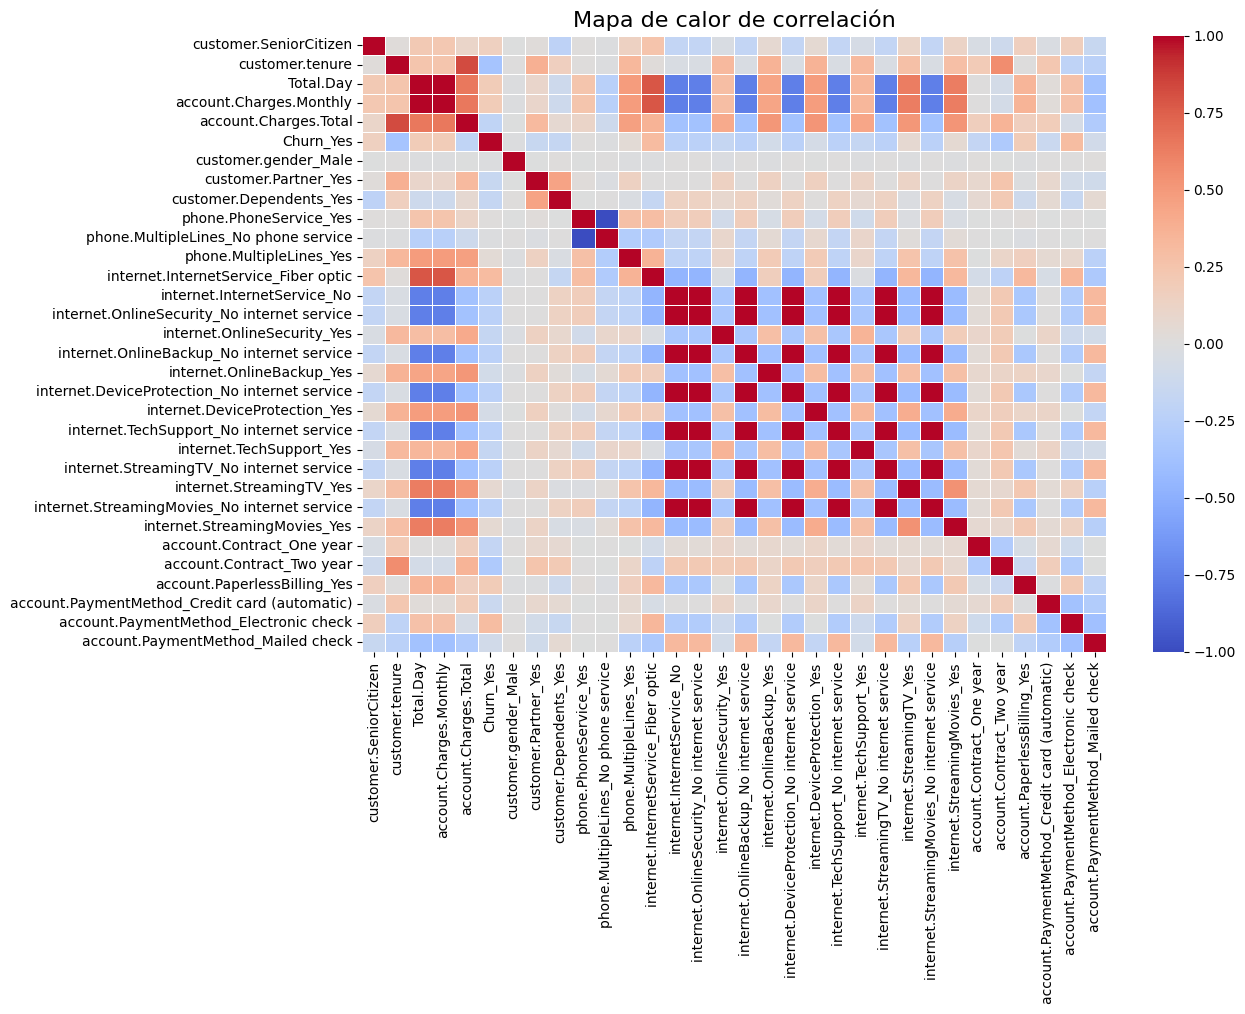

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df_encoded.corr()

# Crear la figura del heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Mapa de calor de correlación', fontsize=16)
plt.show()


In [9]:
# Calculamos correlación con la variable objetivo
target_corr = df_encoded.corr()['Churn_Yes'].abs()

# Filtramos variables con correlación >= 0.2, excluyendo la propia 'Churn_Yes'
relevant_vars = target_corr[(target_corr >= 0.2) & (target_corr.index != 'Churn_Yes')].index

print("Variables relevantes:\n", relevant_vars.tolist())


Variables relevantes:
 ['customer.tenure', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineBackup_No internet service', 'internet.DeviceProtection_No internet service', 'internet.TechSupport_No internet service', 'internet.StreamingTV_No internet service', 'internet.StreamingMovies_No internet service', 'account.Contract_Two year', 'account.PaymentMethod_Electronic check']


In [10]:
# Subconjunto con variables relevantes y Churn_Yes
df_relevant = df_encoded[relevant_vars.tolist() + ['Churn_Yes']]

corr_matrix = df_relevant.corr()


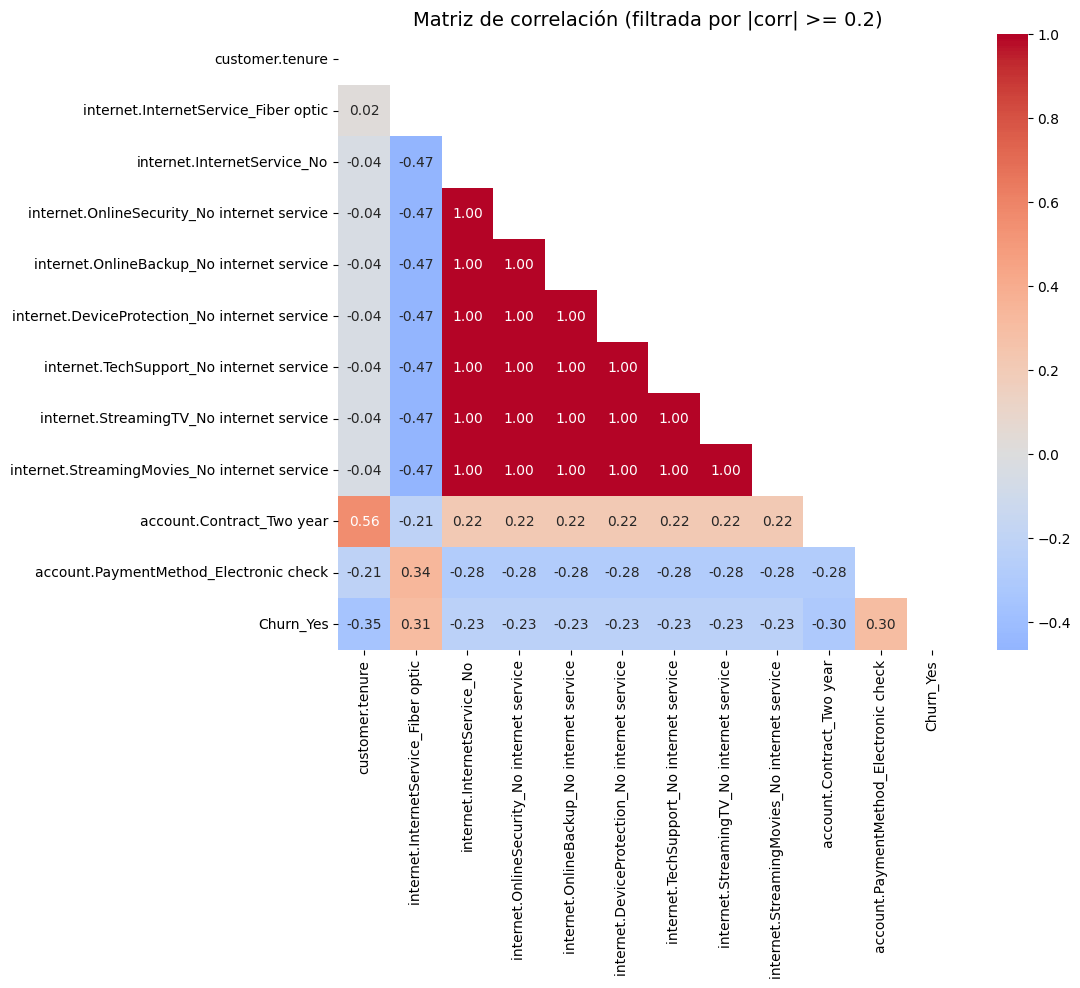

In [11]:
import numpy as np

# Creamos máscara
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Graficar heatmap con la máscara
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de correlación (filtrada por |corr| >= 0.2)", fontsize=14)
plt.show()


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Dataset solo con variables relevantes (sin la variable objetivo)
X = df_relevant.drop(columns=['Churn_Yes'])
X_const = add_constant(X)
X_const= X_const.astype(float)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)for i in range(X_const.shape[1])]
#display( vif_data.sort_values(by="VIF", ascending=False))
vif_data = vif_data.sort_values(by="VIF", ascending=False)

print("\nVIF de las variables:")
print(vif_data)



VIF de las variables:
                                          feature       VIF
3                     internet.InternetService_No       inf
6   internet.DeviceProtection_No internet service       inf
5       internet.OnlineBackup_No internet service       inf
4     internet.OnlineSecurity_No internet service       inf
8        internet.StreamingTV_No internet service       inf
9    internet.StreamingMovies_No internet service       inf
7        internet.TechSupport_No internet service       inf
0                                           const  5.616386
10                      account.Contract_Two year  1.641360
1                                 customer.tenure  1.557540
2            internet.InternetService_Fiber optic  1.383866
11         account.PaymentMethod_Electronic check  1.234224


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [13]:
# Eliminamos las columnas "No internet service" que causan multicolinealidad
cols_to_drop_vif = [col for col in df_relevant.columns if 'No internet service' in col]
df_relevant_vif = df_relevant.drop(columns=cols_to_drop_vif)

# Volvemos a calcular el VIF sin las columnas problemáticas
X_vif = df_relevant_vif.drop(columns=['Churn_Yes'])
X_const_vif = add_constant(X_vif)
X_const_vif = X_const_vif.astype(float)

vif_data_corrected = pd.DataFrame()
vif_data_corrected["feature"] = X_const_vif.columns
vif_data_corrected["VIF"] = [variance_inflation_factor(X_const_vif.values, i)for i in range(X_const_vif.shape[1])]
vif_data_corrected = vif_data_corrected.sort_values(by="VIF", ascending=False)

print("\nVIF de las variables (corregido):")
print(vif_data_corrected)


VIF de las variables (corregido):
                                  feature       VIF
0                                   const  5.616386
4               account.Contract_Two year  1.641360
1                         customer.tenure  1.557811
2    internet.InternetService_Fiber optic  1.383866
3             internet.InternetService_No  1.357135
5  account.PaymentMethod_Electronic check  1.234224


In [14]:
# =====================================
# Importar librerías
# =====================================
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# =====================================
# Separar features y target
# =====================================
X = df_relevant_vif.drop(columns=['Churn_Yes'])
y = df_relevant_vif['Churn_Yes']




In [15]:
# =====================================
# 3. División train / test
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape)
print("Tamaño prueba:", X_test.shape)



Tamaño entrenamiento: (5634, 5)
Tamaño prueba: (1409, 5)


In [16]:
# =====================================
#  Normalizar features
# =====================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =====================================
#  Balancear con SMOTE
# =====================================
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("Distribución después de SMOTE:", np.bincount(y_train_bal))

Distribución después de SMOTE: [4139 4139]


In [17]:
# =====================================
# Entrenar modelo baseline: Regresión Logística
# =====================================
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenamiento con los datos balanceados
log_reg.fit(X_train_bal, y_train_bal)

# =====================================
# Predicciones
# =====================================
y_pred = log_reg.predict(X_test_scaled)



In [18]:
# =====================================
#  Evaluación
# =====================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.7331440738112136

Matriz de Confusión:
 [[737 298]
 [ 78 296]]

Reporte de Clasificación:
               precision    recall  f1-score   support

       False       0.90      0.71      0.80      1035
        True       0.50      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

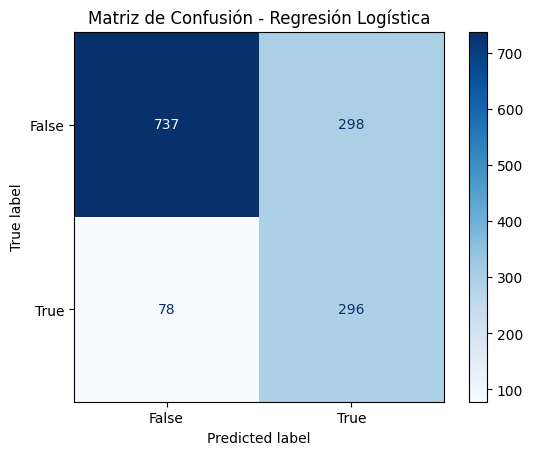

In [20]:
# --- Matriz de Confusión ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


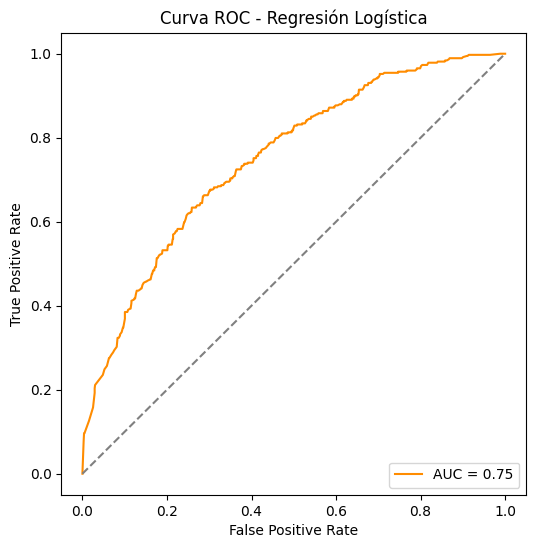

In [21]:
# --- Curva ROC ---
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilidades de clase positiva
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [23]:
#-----------------------
# Ramdon Forest
#-----------------------
rf_model = RandomForestClassifier(
    n_estimators=200,      # número de árboles
    max_depth=None,        # sin límite de profundidad
    random_state=42,
    class_weight="balanced" # opcional, si hay desbalance en clases
)
rf_model.fit(X_train, y_train)

# 3. Predicciones
y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

Matriz de Confusión
[[737 298]
 [104 270]]
TN: 737, FP: 298, FN: 104, TP: 270


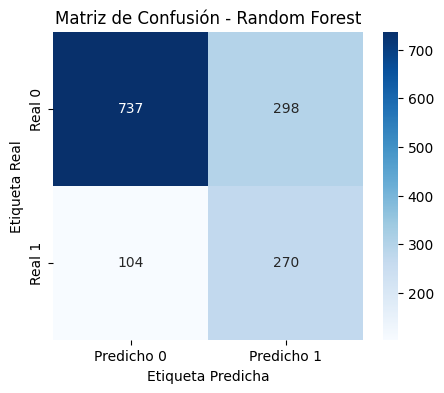

In [24]:
#  Matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)
TN, FP, FN, TP = cm.ravel()
print("Matriz de Confusión")
print(cm)
print(f"TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}")

# Visualización
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicho 0", "Predicho 1"], yticklabels=["Real 0", "Real 1"])
plt.title("Matriz de Confusión - Random Forest")
plt.ylabel("Etiqueta Real")
plt.xlabel("Etiqueta Predicha")
plt.show()

In [25]:
#  Métricas
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf))


Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.88      0.71      0.79      1035
        True       0.48      0.72      0.57       374

    accuracy                           0.71      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.71      0.73      1409



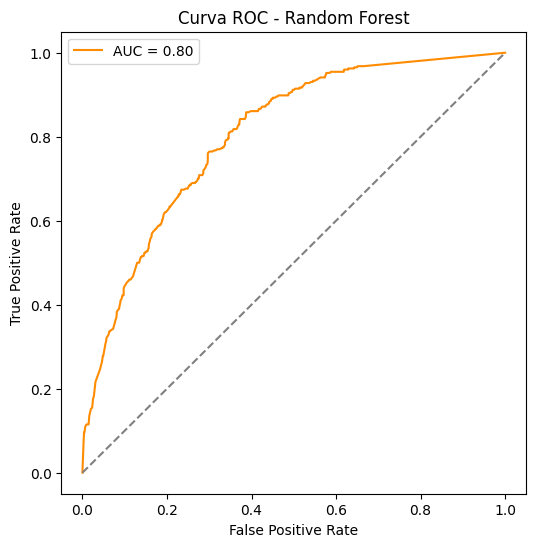

In [26]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
auc = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="darkorange", label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("Curva ROC - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

                                 Variable  Importancia
0                         customer.tenure     0.507648
3               account.Contract_Two year     0.184360
1    internet.InternetService_Fiber optic     0.158730
4  account.PaymentMethod_Electronic check     0.090231
2             internet.InternetService_No     0.059030


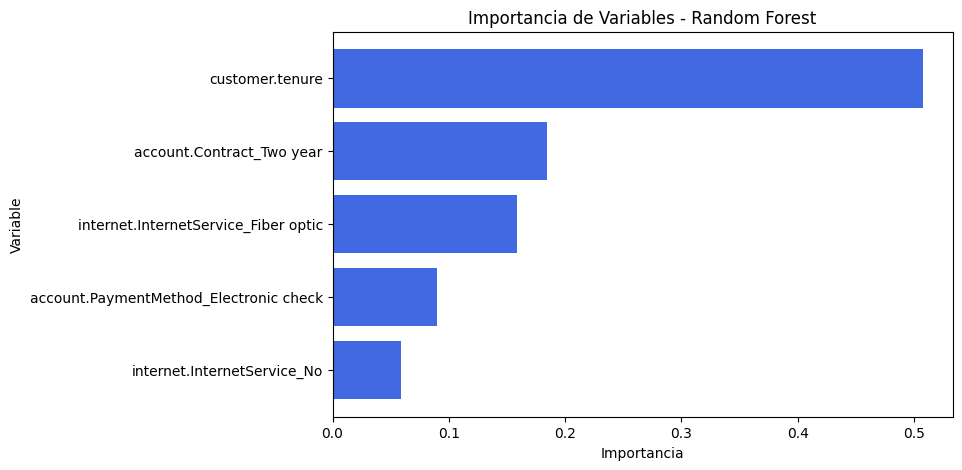

In [27]:


# Importancias
importancias = rf_model.feature_importances_
variables = X.columns

df_importancia = pd.DataFrame({
    'Variable': variables,
    'Importancia': importancias
}).sort_values(by="Importancia", ascending=False)

# Mostrar tabla
print(df_importancia)

# Gráfico
plt.figure(figsize=(8,5))
plt.barh(df_importancia["Variable"], df_importancia["Importancia"], color="royalblue")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de Variables - Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Dividir los datos (ajusta X e y con tus variables)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo base
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],         # Número de árboles
    'max_depth': [None, 5, 10, 20],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],         # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],           # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2']         # Estrategia para seleccionar features
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='roc_auc',           # métrica: AUC
    n_jobs=-1,                   # usar todos los núcleos
    verbose=2
)

# Entrenar
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en train y test
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print("\n--- Rendimiento en Train ---")
print(classification_report(y_train, y_train_pred))
print("AUC Train:", roc_auc_score(y_train, best_rf.predict_proba(X_train)[:,1]))

print("\n--- Rendimiento en Test ---")
print(classification_report(y_test, y_test_pred))
print("AUC Test:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

# Matriz de confusión en test
print("\nMatriz de confusión en Test:")
print(confusion_matrix(y_test, y_test_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros encontrados:
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

--- Rendimiento en Train ---
              precision    recall  f1-score   support

       False       0.82      0.92      0.87      3612
        True       0.67      0.46      0.55      1318

    accuracy                           0.80      4930
   macro avg       0.75      0.69      0.71      4930
weighted avg       0.78      0.80      0.78      4930

AUC Train: 0.8470796636401676

--- Rendimiento en Test ---
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1562
        True       0.66      0.48      0.56       551

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.71      2113
weighted avg       0.79      0.80      0.79      2113

AUC Test: 0.8327165600433155

Matriz de confus

In [29]:
import pickle
try:
  with open('champion.pkl','wb') as file:
    pickle.dump(best_rf, file)
    print("Modelo guardado con exito")
except Exception as e:
  print("No se pudo guardar el modelo",(e))

Modelo guardado con exito
